In [14]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from collections import Counter

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pickle
import spacy
nlp_large = spacy.load('en_core_web_lg')
from wordcloud import WordCloud
import textacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import scipy

/Users/axr524/opt/anaconda3/envs/nlp_course/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [34]:
with open('ohio_restaurants.pkl','rb') as f:
    ohio_restaurants = pickle.load(f)
with open('imp_ohio_reviews.pkl','rb') as f:
    imp_ohio_reviews = pickle.load(f)

In [35]:
ohio_restaurants.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,sep_categories
83,7j0kor_fkeYhyEpXh4OpnQ,Scramblers - Strongsville,16726 Pearl Rd,Strongsville,OH,44136,41.295689,-81.835722,3.5,81,1,"{'BusinessAcceptsCreditCards': 'True', 'Ambien...","Breakfast & Brunch, Restaurants, American (Tra...","{'Monday': '6:30-15:0', 'Tuesday': '6:30-15:0'...","[Breakfast & Brunch, Restaurants, American (Tr..."
115,8Hvp1tYKiQbBgGIwkCRK5g,Tony's Family Restaurant,1515 W Pleasant Valley Rd,Parma,OH,44134,41.361185,-81.688755,4.0,60,1,"{'OutdoorSeating': 'False', 'RestaurantsReserv...","Coffee & Tea, Restaurants, Food, Breakfast & B...","{'Monday': '6:0-21:0', 'Tuesday': '6:0-21:0', ...","[Coffee & Tea, Restaurants, Food, Breakfast & ..."
433,owV0aSgh4t_9aG56iPxGEw,Panda Express,6895 Ridge Rd,Parma,OH,44129,41.378045,-81.734138,2.5,57,1,"{'RestaurantsTableService': 'False', 'Restaura...","Chinese, Fast Food, Restaurants","{'Monday': '10:30-21:30', 'Tuesday': '10:30-21...","[Chinese, Fast Food, Restaurants]"
492,Ra5fI9BEAuWWaLJSfkiCiQ,White Oaks,777 Cahoon Rd,Westlake,OH,44145,41.475638,-81.924795,3.5,143,1,"{'GoodForKids': 'False', 'RestaurantsReservati...","Mediterranean, Salad, Seafood, American (New),...","{'Monday': '17:0-22:0', 'Tuesday': '17:0-22:0'...","[Mediterranean, Salad, Seafood, American (New)..."
577,ErxACeMyF4hSQyGhpEt4Tw,Peppermint Thai Cuisine,30769 Pinetree Rd,Pepper Pike,OH,44124,41.462942,-81.461824,4.0,217,1,"{'OutdoorSeating': 'False', 'RestaurantsTakeOu...","Restaurants, Thai","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-2...","[Restaurants, Thai]"


In [16]:
imp_ohio_reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5.0,1,0,0,I love Deagan's. I do. I really do. The atmosp...,2015-12-05 03:18:11
1,jCza0LPv1vNU0FF-NFMWQA,V34qejxNsCbcgD8C0HVk-Q,ErxACeMyF4hSQyGhpEt4Tw,5.0,1,1,1,This is definitely one of my favorite Thai res...,2019-12-04 14:09:06
2,14_N-s_7TsEpzgjnXJMu9Q,V34qejxNsCbcgD8C0HVk-Q,eoJfl5vG7X87QhcKb0nt5Q,4.0,4,1,3,This is exactly what you think it will be. A h...,2014-11-27 05:28:11
3,eE3ekstCj5dNcBJVsbOJBw,V34qejxNsCbcgD8C0HVk-Q,VH2BjFjc9usDquDgoHhptA,4.0,2,0,2,How exciting to have another great Barrio loca...,2015-02-11 03:05:31
4,B6-F7JQzRIiMQpphyPR3VA,V34qejxNsCbcgD8C0HVk-Q,0youcKV6-eE3F2MQj1l6Fw,4.0,1,0,1,I attended a group event here with about 80 pe...,2014-11-08 19:11:34


In [36]:
categories_list = ohio_restaurants['sep_categories'].values.flatten()
categories_list = [item for sublist in categories_list for item in sublist]

In [212]:
corpus = [ohio_restaurants['sep_categories'].iloc[i] for i in range(len(ohio_restaurants))]
unique_categories = sorted(list(set(categories_list)))

In [220]:
from collections import Counter
# col is a list of entries
def count_vectorizer(col):    # custom countvectorizer
    m = len(unique_categories)
    lst = [None] * m
    for i in range(m):
        if unique_categories[i] in col:
            lst[i] = 1
        else:    
            lst[i] = 0
    return lst    

# Function to check how many documents in the corpus contain the word
def idf(word):
    count = 0
    n = len(corpus)
    for i in range(n):
        if word in corpus[i]:
            count += 1
    return count


def tfidf_vectorizer(col):    # custom tfidfvectorizer
    m = len(unique_categories)
    lst = [None]*m
    counter = Counter()
    for word in col:
        counter[word] += 1
    for i in range(m):
        if unique_words[i] in col:
            tf = counter[unique_categories[i]]/len(col)
            inv_df = np.log((n + 1)/(idf(unique_categories[i]) + 1))
            tfidf = tf*inv_df
            lst[i] = tfidf
        else:
            lst[i] = 0
    return lst

In [ ]:
# ['count_vect'] = ['Documents'].apply(count_vectorizer)
# ['tfidf_vect'] = ['Documents'].apply(tfidf_vectorizer)


In [221]:
unique_categories

['Accessories',
 'Active Life',
 'Adult Education',
 'Adult Entertainment',
 'Afghan',
 'African',
 'American (New)',
 'American (Traditional)',
 'Amusement Parks',
 'Arcades',
 'Art Galleries',
 'Arts & Crafts',
 'Arts & Entertainment',
 'Asian Fusion',
 'Bagels',
 'Bakeries',
 'Barbeque',
 'Bars',
 'Beauty & Spas',
 'Bed & Breakfast',
 'Beer',
 'Beer Bar',
 'Beer Gardens',
 'Belgian',
 'Bistros',
 'Bowling',
 'Brasseries',
 'Brazilian',
 'Breakfast & Brunch',
 'Breweries',
 'Brewpubs',
 'British',
 'Bubble Tea',
 'Buffets',
 'Burgers',
 'Burmese',
 'Butcher',
 'Cafes',
 'Cajun/Creole',
 'Cambodian',
 'Cantonese',
 'Caribbean',
 'Casinos',
 'Caterers',
 'Cheesesteaks',
 'Chicken Shop',
 'Chicken Wings',
 'Chinese',
 'Chocolatiers & Shops',
 'Cigar Bars',
 'Cinema',
 'Cocktail Bars',
 'Coffee & Tea',
 'Coffee Roasteries',
 'Colombian',
 'Comfort Food',
 'Community Service/Non-Profit',
 'Contractors',
 'Cooking Classes',
 'Cooking Schools',
 'Couriers & Delivery Services',
 'Creperies',

In [28]:
dict_category = Counter()
for item in categories_list:
    dict_category[item] += 1

In [42]:
dict_category_sorted = sorted(dict_category.items(),key = lambda x: x[1],reverse = True)

In [200]:
dict_category_sorted

[('Restaurants', 1325),
 ('Nightlife', 429),
 ('Bars', 424),
 ('American (Traditional)', 332),
 ('Food', 332),
 ('American (New)', 271),
 ('Sandwiches', 160),
 ('Italian', 155),
 ('Breakfast & Brunch', 154),
 ('Pizza', 153),
 ('Burgers', 131),
 ('Seafood', 107),
 ('Event Planning & Services', 106),
 ('Mexican', 103),
 ('Salad', 96),
 ('Pubs', 86),
 ('Steakhouses', 85),
 ('Caterers', 71),
 ('Sports Bars', 69),
 ('Japanese', 68),
 ('Sushi Bars', 67),
 ('Beer', 67),
 ('Wine & Spirits', 67),
 ('Wine Bars', 65),
 ('Chinese', 62),
 ('Fast Food', 62),
 ('Cocktail Bars', 59),
 ('Desserts', 59),
 ('Diners', 59),
 ('Mediterranean', 54),
 ('Asian Fusion', 48),
 ('Barbeque', 48),
 ('Coffee & Tea', 47),
 ('Thai', 45),
 ('Cafes', 45),
 ('Chicken Wings', 44),
 ('Specialty Food', 43),
 ('Delis', 42),
 ('Vegetarian', 41),
 ('Bakeries', 38),
 ('Middle Eastern', 37),
 ('Gluten-Free', 37),
 ('Arts & Entertainment', 37),
 ('Soup', 35),
 ('Gastropubs', 32),
 ('Vegan', 30),
 ('Beer Bar', 29),
 ('Venues & Eve

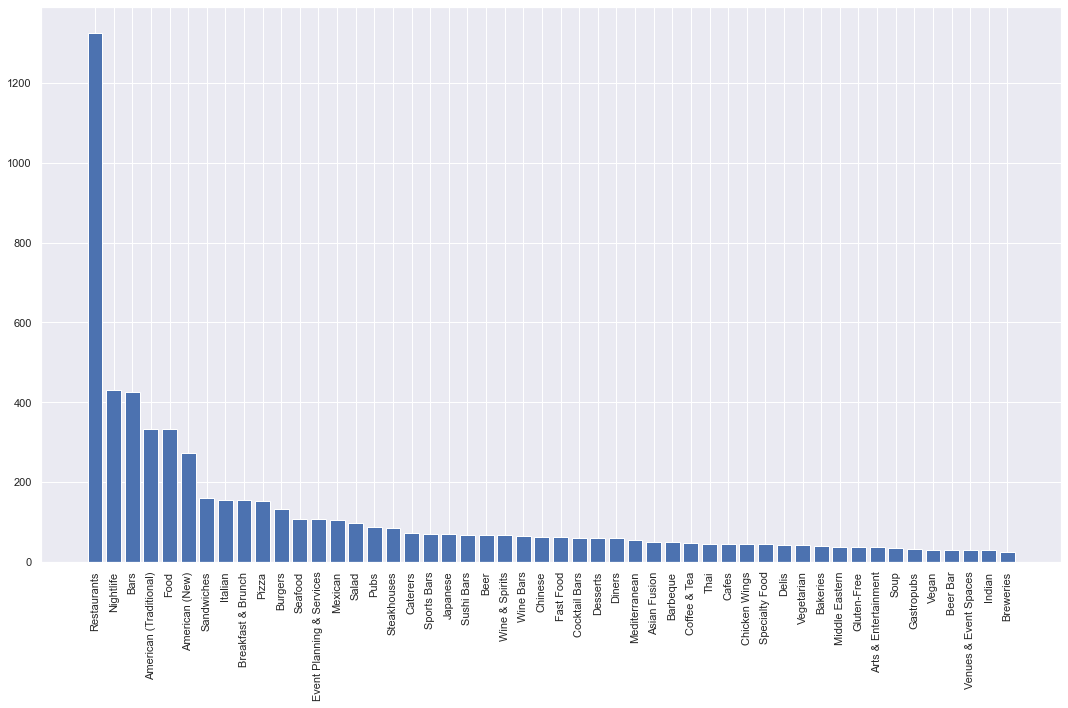

In [60]:
# Let's see the distribution of these categories.
indices = np.arange(len(dict_category_sorted[:50]))
word = []
frequency = []

for i in range(len(dict_category_sorted[:50])):
    word.append(dict_category_sorted[i][0])
    frequency.append(dict_category_sorted[i][1])
plt.figure(figsize=(15,10))
plt.bar(indices, frequency, color='b')
plt.xticks(indices, word, rotation='vertical')
plt.tight_layout()
plt.show()

### Text processing of the reviews

In [131]:
imp_ohio_reviews.head()

,review_id,user_id,business_id,stars,text,date
0,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5.0,I love Deagan's. I do. I really do. The atmosp...,2015-12-05 03:18:11
1,jCza0LPv1vNU0FF-NFMWQA,V34qejxNsCbcgD8C0HVk-Q,ErxACeMyF4hSQyGhpEt4Tw,5.0,This is definitely one of my favorite Thai res...,2019-12-04 14:09:06
2,14_N-s_7TsEpzgjnXJMu9Q,V34qejxNsCbcgD8C0HVk-Q,eoJfl5vG7X87QhcKb0nt5Q,4.0,This is exactly what you think it will be. A h...,2014-11-27 05:28:11
3,eE3ekstCj5dNcBJVsbOJBw,V34qejxNsCbcgD8C0HVk-Q,VH2BjFjc9usDquDgoHhptA,4.0,How exciting to have another great Barrio loca...,2015-02-11 03:05:31
4,B6-F7JQzRIiMQpphyPR3VA,V34qejxNsCbcgD8C0HVk-Q,0youcKV6-eE3F2MQj1l6Fw,4.0,I attended a group event here with about 80 pe...,2014-11-08 19:11:34


In [117]:
import datetime

In [120]:
imp_ohio_reviews['date'][0]

'2015-12-05 03:18:11'

In [126]:
imp_ohio_reviews['date'] = imp_ohio_reviews['date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

In [130]:
imp_ohio_reviews.drop(['useful','funny','cool'],axis=1,inplace=True)

In [132]:
# Let's clean the text

In [139]:
def preprocess(text):
    text = text.translate(string.punctuation)
    text = text.lower().split()    
    text = [w for w in text if not w in stopwords and len(w) > 0]    
    text = " ".join(text)
    
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ", text)
    text = re.sub(r"\+", " ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r":", " ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)    
    return text

In [140]:
imp_ohio_reviews['clean_text'] = imp_ohio_reviews['text'].apply(preprocess)

In [144]:
for i in range(2):
    print(imp_ohio_reviews.iloc[i]['text'])
    print('\n')
    print(imp_ohio_reviews.iloc[i]['clean_text'])
    print('-'*100)

I love Deagan's. I do. I really do. The atmosphere is cozy and festive. The shrimp tacos and house fries are my standbys. The fries are sometimes good and sometimes great, and the spicy dipping sauce they come with is to die for. The beer list is amazing and the cocktails are great. The prices are mid-level, so it's not a cheap dive you can go to every week, but rather a treat when you do. Try it out. You won't be disappointed!


love deagan do really do atmosphere cozy festive shrimp tacos house fries standbys fries sometimes good sometimes great spicy dipping sauce come die for beer list amazing cocktails great prices mid - level cheap dive go every week rather treat do try out disappointed ! 
----------------------------------------------------------------------------------------------------
This is definitely one of my favorite Thai restaurants in the Cleveland area. It's always satisfying, with delicious food and great service. It gets crowded, especially on weekends, so get there

### One hot encoding over the dishes!

### There are multiple reviews per user as well as per restaurant

In [160]:
user_rev = imp_ohio_reviews.groupby('user_id').agg({'clean_text': ' '.join})
rest_rev = imp_ohio_reviews.groupby('business_id').agg({'clean_text': ' '.join})

In [203]:
imp_ohio_reviews.groupby('business_id').describe()

stars                                             
                        count      mean       std  min  25%  50%  75%  max
business_id                                                               
--I7YYLada0tSLkORTHb5Q   61.0  3.426230  1.296907  1.0  2.0  4.0  4.0  5.0
--S62v0QgkqQaVUhFnNHrw   25.0  2.440000  1.529706  1.0  1.0  2.0  4.0  5.0
-8O8sVCnaIKHP-596zN9UA  137.0  3.788321  1.302885  1.0  3.0  4.0  5.0  5.0
-B_4pHQkzU12AMaYkkY4cw   60.0  3.750000  1.067628  1.0  3.0  4.0  4.0  5.0
-Biboxy2pG3MovBOF_r4SQ   38.0  2.578947  1.426233  1.0  1.0  2.0  4.0  5.0
...                       ...       ...       ...  ...  ...  ...  ...  ...
zm8u9z2KCwEkNiCD59UQ3Q   23.0  4.000000  1.167748  1.0  4.0  4.0  5.0  5.0
ztQH2Q99E3D-iSdfImqjcQ   45.0  4.111111  0.958745  2.0  3.0  4.0  5.0  5.0
zutT311xSgH_Gbdza_jc1w   32.0  3.781250  0.906406  2.0  3.0  4.0  4.0  5.0
zydbdBR6-CM8UZ6WkW1DWA   43.0  3.209302  1.440207  1.0  2.0  4.0  4.0  5.0
zzSYBWuv_fXGtSgsO-6_1g  159.0  3.830189  0.969193  1.0  3.0  4.0  4.0  5.0

[1325 rows x 8 columns]

In [181]:
user_rev.head()

,clean_text
user_id,
--J8UruLD_xvVuI1lMAxpA,lived cleveland often took customers favorite ...
--_nP6G2mAHyrEFtIG6ggw,amazing meal ! beef cheek pierogi delicious be...
--amZ_cR9Zgu4B1RrAHJyA,small casino horseshoe pretty nice staff frien...
--cO5bedOWodnt8UgamQNA,service great ! chips alright just tortilla ch...
--inoxVRk5TYjhuI4e304A,would come back buffet lunch last time came ex...


In [172]:
tfidf_user = TfidfVectorizer(max_features=5000)
tfidf_rest = TfidfVectorizer(max_features=5000)

In [173]:
trans_user_rev = tfidf_user.fit_transform(user_rev['clean_text'])

In [174]:
trans_rest_rev = tfidf_rest.fit_transform(rest_rev['clean_text'])

### I could use some kind of similarity measure!

In [175]:
trans_rest_rev[0].toarray()

array([[0.00817581, 0.        , 0.02750974, ..., 0.        , 0.        ,
        0.        ]])

## SpaCy word2vec

Make a function to check the similarities between two text reviews

In [191]:
def check_similarities(str1,str2):
    doc1 = nlp_large(str1)
    doc2 = nlp_large(str2)
    return doc1.similarity(doc2)

### We can use this function to calculate the similarity between the reviews for user 1 and user2

In [199]:
# Similarity between user 1 and user 2
check_similarities(user_rev.iloc[0]['clean_text'],user_rev.iloc[500]['clean_text'])

0.9437591060919381

In [195]:
# Similarity between user 1 and user 2
check_similarities(rest_rev.iloc[0]['clean_text'],rest_rev.iloc[1]['clean_text'])

0.9868397911185005

##  VADER polarity scores 

In [89]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [65]:
sid = SentimentIntensityAnalyzer()

In [141]:
sid.polarity_scores(imp_ohio_reviews['clean_text'][0])

{'neg': 0.106, 'neu': 0.514, 'pos': 0.38, 'compound': 0.9589}

In [70]:
imp_ohio_reviews['stars'][0]

5.0

In [143]:
for i in range(100):
    item_star = imp_ohio_reviews['stars'][i]
    if item_star <= 2.0:
        pol_dict = sid.polarity_scores(imp_ohio_reviews['clean_text'][i])
        if pol_dict['pos'] >= pol_dict['neg']:
            item_pol = pol_dict['compound']
        elif pol_dict['pos'] + 0.02 < pol_dict['neg']:
            item_pol = pol_dict['compound']
        else:
            item_pol = -pol_dict['compound']

        print(f"The star rating is {item_star} \nThe compound score is {pol_dict} \nThe polarity score in {item_pol}")
        print(imp_ohio_reviews['clean_text'][i])
        print('\n')

The star rating is 1.0 
The compound score is {'neg': 0.046, 'neu': 0.771, 'pos': 0.183, 'compound': 0.6908} 
The polarity score in 0.6908
commented slow service last august went last night taco tuesday meet friends seated 6 25pm left 6 40pm one stopped table take drink order servers visited 3 tables around us one seemed notice care there excuse servers knowing sections 


The star rating is 2.0 
The compound score is {'neg': 0.032, 'neu': 0.668, 'pos': 0.299, 'compound': 0.875} 
The polarity score in 0.875
service consistently slow staring couple waiting server pick credit card they bill fifteen minutes look like they will leave bartender makes good drinks enough servers servers friendly entirely many tables 


The star rating is 1.0 
The compound score is {'neg': 0.089, 'neu': 0.826, 'pos': 0.086, 'compound': 0.1591} 
The polarity score in -0.1591
love food here love location service consistently crap past two visits last night pushed limit we seated immediately reservation promptly 

## Vader is not able to capture the negative sentiments!

## Latent Dirichlet Allocation(LDA) 

In [101]:

stopwords = set(stopwords.words('english'))

In [102]:
cv = CountVectorizer(min_df=0.1,max_df=0.9,stop_words=stopwords,)

In [103]:
matrix = cv.fit_transform(imp_ohio_reviews['text'])

In [104]:
matrix

<109248x65 sparse matrix of type '<class 'numpy.longlong'>'
	with 1201673 stored elements in Compressed Sparse Row format>

In [94]:
from sklearn.decomposition import LatentDirichletAllocation

In [105]:
LDA = LatentDirichletAllocation(n_components=5,random_state=42)

In [106]:
LDA.fit(matrix)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=5, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=42, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [108]:
LDA.components_[0]

array([1.08637490e+04, 1.28961075e+01, 1.51446325e+03, 1.33589934e+03,
       9.18723704e+02, 3.22918025e+03, 9.21615274e+01, 1.01995673e+01,
       2.34514419e+03, 1.99098020e+03, 3.18407224e+03, 1.20820581e+04,
       2.42675472e+04, 3.61457978e+02, 1.19051714e+03, 2.22499104e+03,
       4.59356239e+03, 6.66922365e+03, 2.92663026e+03, 8.26826874e+02,
       9.39538589e+02, 1.69222890e+03, 1.06222046e+02, 9.63888032e+02,
       9.63639960e+03, 5.82503573e+03, 1.33538152e+03, 2.49460780e+03,
       1.55355364e+03, 3.52482571e+04, 6.60373315e+03, 6.07659023e+03,
       9.44176582e+03, 8.85093284e+03, 6.88796703e+02, 2.56200783e+03,
       7.59759688e+02, 3.92394433e+03, 3.86631934e+03, 3.58890692e+03,
       1.54133784e+02, 9.26813408e+03, 9.43273545e+02, 2.58357928e+03,
       2.03927296e+03, 1.02997436e+04, 2.44870608e+02, 6.29211225e+03,
       7.57818480e+03, 1.25065714e+04, 3.13885694e+03, 1.65114678e+04,
       5.14944951e+03, 7.72711912e+03, 7.77290521e+01, 1.20822046e+02,
      

In [109]:
cv.get_feature_names()

['also',
 'always',
 'amazing',
 'area',
 'atmosphere',
 'back',
 'bar',
 'beer',
 'best',
 'better',
 'came',
 'cheese',
 'chicken',
 'cleveland',
 'come',
 'could',
 'definitely',
 'delicious',
 'dinner',
 'eat',
 'even',
 'everything',
 'experience',
 'first',
 'food',
 'fresh',
 'friendly',
 'get',
 'go',
 'good',
 'got',
 'great',
 'like',
 'little',
 'love',
 'made',
 'make',
 'meal',
 'menu',
 'much',
 'never',
 'nice',
 'night',
 'one',
 'order',
 'ordered',
 'people',
 'place',
 'pretty',
 'really',
 'restaurant',
 'sauce',
 'service',
 'side',
 'staff',
 'table',
 'think',
 'time',
 'try',
 'two',
 'us',
 'wait',
 'well',
 'went',
 'would']

In [110]:
single_topic = LDA.components_[0]

In [113]:
for index in single_topic.argsort()[:10]:
    print(cv.get_feature_names()[index])
    

beer
always
us
wait
staff
bar
experience
table
never
people


In [114]:
for topic in LDA.components_:
    for index in topic.argsort()[:10]:
        print(cv.get_feature_names()[index])
    print('-'*50)

beer
always
us
wait
staff
bar
experience
table
never
people
--------------------------------------------------
chicken
sauce
always
ordered
came
order
fresh
table
us
got
--------------------------------------------------
chicken
always
beer
love
go
sauce
eat
cheese
never
pretty
--------------------------------------------------
beer
came
ordered
got
us
went
bar
chicken
atmosphere
table
--------------------------------------------------
beer
always
atmosphere
chicken
staff
friendly
fresh
love
great
delicious
--------------------------------------------------


### All the reviews are food and restaurant related so, LDA is not able to capture the individual topics!